In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression, make_swiss_roll
import seaborn as sns

MACHINE LEARNING

## UNSUPERVISED LEARNING - DBSCAN Clustering using PCA & T-SNE

In [ ]:
# Import the data
# file_path = Path("/content/Copy_of_myopia.csv")
# df = pd.read_csv(file_path)
url = 'https://raw.githubusercontent.com/mward95/project_4/main/data/Copy_of_myopia.csv'
df = pd.read_csv(url)
df.head()

,ID,STUDYYEAR,MYOPIC,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,1,1992,1,6,1,-0.052,21.89,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,2,1995,0,6,1,0.608,22.38,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,3,1991,0,6,1,1.179,22.49,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,4,1990,1,6,1,0.525,22.20,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,1995,0,5,0,0.697,23.29,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [ ]:
# There were 81 myopic children samples and 537 non-myopic children samples
df["MYOPIC"].value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

In [ ]:
labels = df['MYOPIC']
labels.value_counts().nunique()

2

In [ ]:
# Remove the Myopic Column
df = df.drop(columns=["MYOPIC", "DIOPTERHR", 'STUDYYEAR'])
df.head()

,ID,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,MOMMY,DADMY
0,1,6,1,-0.052,21.89,3.690,3.498,14.70,45,8,0,0,10,1,1
1,2,6,1,0.608,22.38,3.702,3.392,15.29,4,0,1,1,7,1,1
2,3,6,1,1.179,22.49,3.462,3.514,15.52,14,0,2,0,10,0,0
3,4,6,1,0.525,22.20,3.862,3.612,14.73,18,11,0,0,4,0,1
4,5,5,0,0.697,23.29,3.676,3.454,16.16,14,0,0,0,4,1,0


In [ ]:
# Find null values
for column in df.columns:
    print(f"Column {column} has {df[column].isnull().sum()} null values")

Column ID has 0 null values
Column AGE has 0 null values
Column GENDER has 0 null values
Column SPHEQ has 0 null values
Column AL has 0 null values
Column ACD has 0 null values
Column LT has 0 null values
Column VCD has 0 null values
Column SPORTHR has 0 null values
Column READHR has 0 null values
Column COMPHR has 0 null values
Column STUDYHR has 0 null values
Column TVHR has 0 null values
Column MOMMY has 0 null values
Column DADMY has 0 null values


In [ ]:
# Find duplicate entries
print(f"Duplicate entries: {df.duplicated().sum()}")

Duplicate entries: 0


Applying Dimensional Reduction

1 - Using PCA

In [ ]:
# Standarize data with StandarScaler
myopia_scaled = StandardScaler().fit_transform(df)
print(myopia_scaled[0:2])

[[-1.7292504  -0.42021911  1.02291623 -1.36391691 -0.89286055  0.4837838
  -0.28144248 -1.01979129  4.1506609   1.69744958 -0.68931054 -0.67299591
   0.18405806  0.98713773  1.0032415 ]
 [-1.72364505 -0.42021911  1.02291623 -0.3086122  -0.17183857  0.53591074
  -0.96799697 -0.13076248 -0.99889822 -0.91206246 -0.36187479 -0.22140908
  -0.34093217  0.98713773  1.0032415 ]]


In [ ]:
# Applying PCA to reduce dimensions from 16 to 2

# Initialize PCA model
pca = PCA(n_components=2)

# Get two principal components for the myopia data.
myopia_pca = pca.fit_transform(myopia_scaled)

In [ ]:
x_pca = pca.transform(myopia_scaled)
print(myopia_scaled.shape)
print(x_pca.shape)

(618, 15)
(618, 2)


Text(0, 0.5, 'Principal component 2')

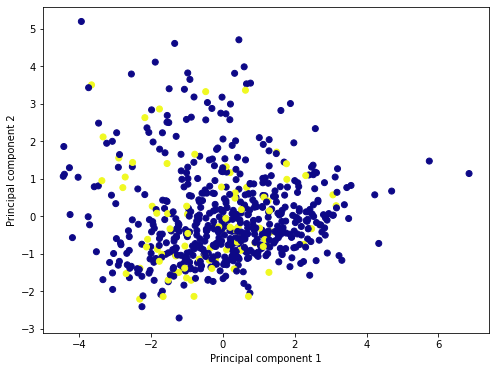

In [ ]:
plt.figure (figsize = (8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=labels, cmap = 'plasma')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')


### x_pca helped compress the 15 columns to 2 columns - The graph above shows Myopic and Non-Myopic children data when plotted against the 2 Principal components

In [ ]:
pca.components_

array([[ 0.04694775, -0.25075373,  0.26140997,  0.24516479, -0.52764017,
        -0.34389424,  0.32199306, -0.49581954, -0.11757259, -0.05326465,
        -0.12177359, -0.14513794, -0.07331773, -0.0459809 , -0.01579828],
       [ 0.18024803,  0.40466844,  0.14322759, -0.00213855, -0.13847229,
        -0.10265866,  0.1318821 , -0.13671131,  0.26753385,  0.48719952,
         0.11592641,  0.58409275,  0.1811893 , -0.13690254, -0.0482314 ]])

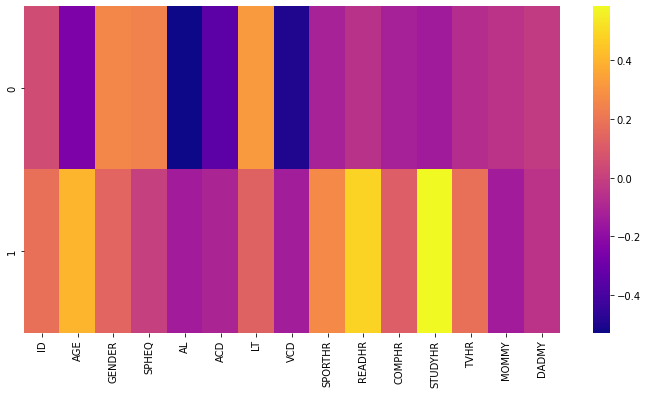

In [ ]:
df_comp = pd.DataFrame(pca.components_,columns=df.columns)
plt.figure(figsize=(12,6))
sns.heatmap(df_comp, cmap='plasma',)

### The Heat map above shows the range of compressed values (using PCA) of the specific variables in each of the DataFrame columns that fall in either of the 2 PCA columns. No relevancy of the specific column to Myopia. 
### For example if we had 3 Principal components instead of 2, the heat map would be the following:
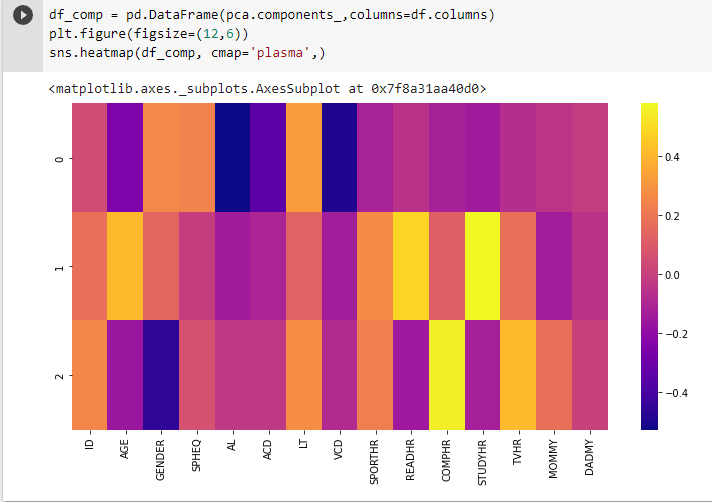

In [ ]:
# Transform PCA data to a DataFrame
df_pca = pd.DataFrame(
    data=myopia_pca, columns=["principal component 1", "principal component 2"] 
    # , "principal component 3"]
)
# , "principal component 3", "principal component 4", "principal component 5", "principal component 6", "principal component 7", "principal component 8", "principal component 9", "principal component 10", "principal component 11", "principal component 12"]
df_pca

,principal component 1,principal component 2
0,0.203978,1.145566
1,0.081947,-1.599329
2,0.624481,-0.893075
3,0.666670,0.763858
4,-1.213548,-2.709388
...,...,...
613,0.518218,0.180469
614,0.161421,-1.181668
615,-0.413300,-1.700667
616,1.493224,0.373378


In [ ]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.19285071, 0.10385065])

## Cluster Analysis with DBSCAN with KNearest Neighbor

(0.0, 1.2)

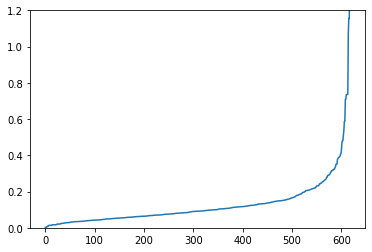

In [885]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(x_pca)
distances, indices = nbrs.kneighbors(x_pca)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.ylim(0, 1.2)

In [887]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Graphically finding Knee of distance and epsilon for DBSCAN

0.22009721231859317


<Figure size 360x360 with 0 Axes>

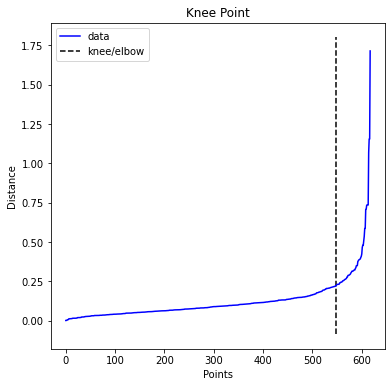

In [888]:
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

### The plot showing distances of points is used to estimate the optimal value of epsilon for DBSCAN - from the plot, and using Knee analysis as shown above, the optimum value of eps = 0.2200972

In [908]:
dbscan = DBSCAN(eps=0.2200973, min_samples=5)
dbscan.fit(x_pca)

DBSCAN(eps=0.2200973)

In [909]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [910]:
labels = dbscan.labels_ 
# labels[::]

In [911]:
# the model returns n clusters by DBSCAN
set(labels)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [912]:
len(set(labels))

14

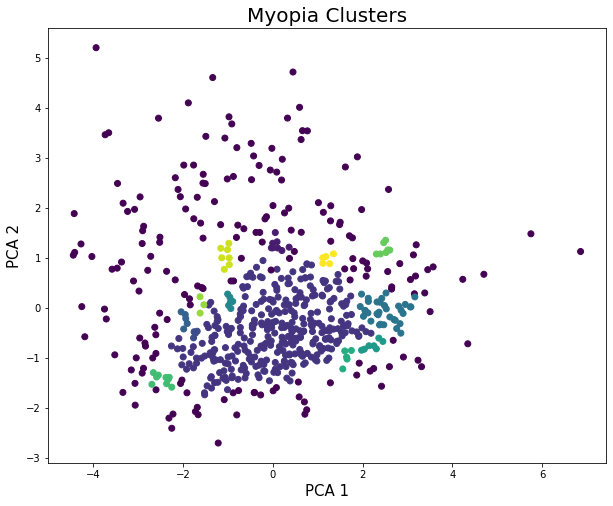

In [913]:
# Plot the results, clustered by DBSCAN
# plt.scatter(data[:,0], data[:,2], c=labels)

plt.figure(figsize=(10,8))
plt.scatter(df_pca['principal component 1'], df_pca['principal component 2'], c=labels)
plt.xlabel('PCA 1', fontsize = 15)
plt.ylabel('PCA 2', fontsize = 15)
plt.title(label = 'Myopia Clusters', fontsize = 20, fontweight = 20)
plt.show()

In [914]:
from sklearn.metrics import silhouette_score

In [915]:
silhouette_score(x_pca, labels)

-0.283371961523175

## Iterating over epsilon and min_samples to find optimum number of clusters using DBSCAN. Sample size above 12 reduces number of clusters to 1

In [918]:
for ep in np.arange(0.219, 0.222, .001):
  for d in range(3, 9, 1):
    dbscan = DBSCAN(eps=ep, min_samples=d).fit(df_pca)
    labels = dbscan.labels_ 
    set(labels)
    lablen = len(set(labels))
    plt.figure(figsize=(10,8))
    plt.scatter(df_pca['principal component 1'], df_pca['principal component 2'], c=labels)
    plt.xlabel('PCA 1', fontsize = 15)
    plt.ylabel('PCA 2', fontsize = 15)
    plt.title(label = f'Myopia Clusters -EPS:{ep} min_sample:{round(d,3)} Number of CLusters:{lablen}', fontsize = 20, fontweight = 20)
    plt.show()
  

Output hidden; open in https://colab.research.google.com to view.